In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lb=LabelEncoder()

In [8]:
data['type']=lb.fit_transform(data['type'])
data['region']=lb.fit_transform(data['region'])

In [9]:
data['type']

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [10]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [12]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)
data.drop('Date',axis=1,inplace=True)

In [13]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
x=data.drop('AveragePrice',axis=1)
y=data['AveragePrice']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy',metrics.r2_score(y_test, y_pred))

MAE: 0.09100723287671234
MSE: 0.01668686560547945
RMSE: 0.12917765133907433
Accuracy 0.9005649709387967


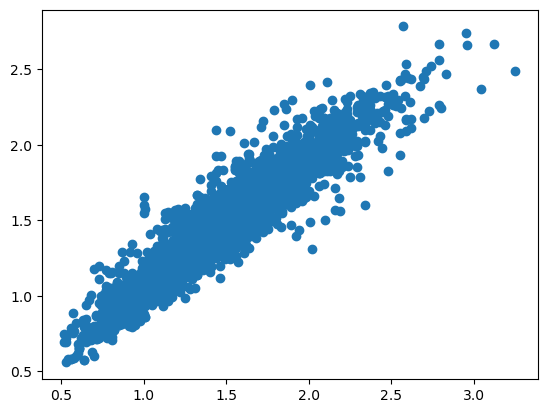

In [19]:
plt.scatter(x=y_test,y=y_pred)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Accuracy',metrics.r2_score(y_test,pred))

MAE: 0.23039029738486302
MSE: 0.089401745931893
RMSE: 0.29900124737514555
Accuracy 0.46726572772654185


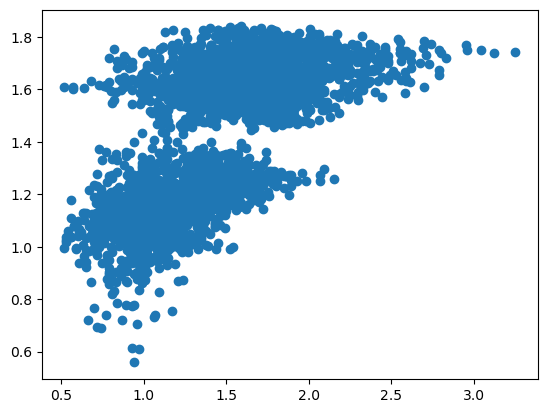

In [22]:
plt.scatter(x=y_test,y=pred)

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred=dtr.predict(x_test)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, dpred))
print('MSE:', metrics.mean_squared_error(y_test, dpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))
print('Accuracy',metrics.r2_score(y_test, dpred))

MAE: 0.12842739726027397
MSE: 0.03909802739726027
RMSE: 0.1977322113295157
Accuracy 0.7670195480446794


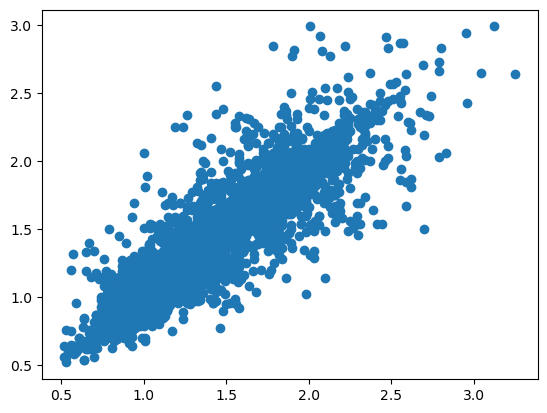

In [25]:
plt.scatter(x=y_test,y=dpred)

In [26]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svpred=svr.predict(x_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, svpred))
print('MSE:', metrics.mean_squared_error(y_test, svpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svpred)))
print('Accuracy',metrics.r2_score(y_test, svpred))

MAE: 0.24822847855091215
MSE: 0.10601879703677865
RMSE: 0.3256052779621034
Accuracy 0.36824671489388416


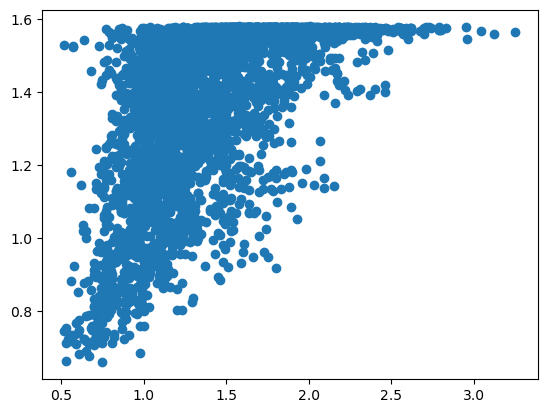

In [28]:
plt.scatter(x=y_test,y=svpred)

In [29]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=7)
ada.fit(x_train,y_train)
adapred=ada.predict(x_test)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, adapred))
print('MSE:', metrics.mean_squared_error(y_test, adapred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, adapred)))
print('Accuracy',metrics.r2_score(y_test, adapred))

MAE: 0.21303419780222219
MSE: 0.07380728546073527
RMSE: 0.2716749628889922
Accuracy 0.5601912457240126


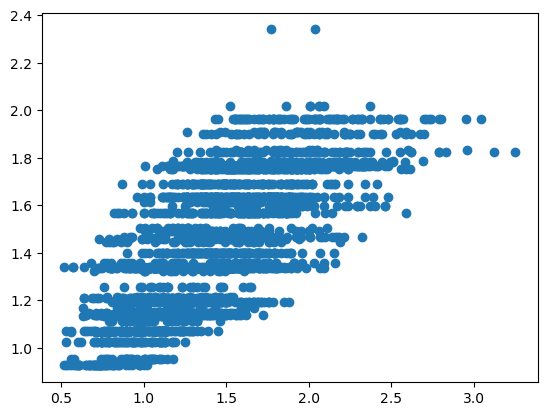

In [31]:
plt.scatter(x=y_test,y=adapred)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor(n_estimators=7)
gd.fit(x_train,y_train)
gdpred=gd.predict(x_test)

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, gdpred))
print('MSE:', metrics.mean_squared_error(y_test, gdpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gdpred)))
print('Accuracy',metrics.r2_score(y_test, gdpred))

MAE: 0.24692530488950112
MSE: 0.10001930163454978
RMSE: 0.31625828310820536
Accuracy 0.4039969878197529


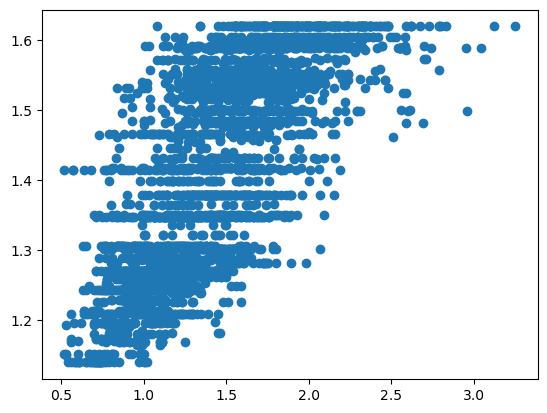

In [34]:
plt.scatter(x=y_test,y=gdpred)